## Задача 1. 60 баллов
Работаем с датасетом https://disk.yandex.ru/d/P6u1Za-nnmtwPA
Скачайте его.

Оцениваем факторы, которые влияют на цену на аренду в Москве.
Описание столбцов:

**metro** - ближайшая станция метро

**price** - цена за аренды


**minutes** - расстояние до метро в минутах

**way** - пусть до метро (пешком или на транспорте)

**views** - просмотры квартиры

**provider** - кто сдает квартиру (собственник, риелтор, застройщик)

**fee_percent** - процент, который получает риелтор

**storey**- этаж

**storeys**- число этажей в здании

**living_area** - жилая площаль

**kitchen_area** - площадь кухни

**total_area** - общая площадь


#### Часть 1. EDA. 10 баллов

In [8]:
import pandas as pd
df = pd.read_csv('rent.csv', index_col=0)

1. Отобразите первые 5 и последние 5 строк. (**1**)

In [9]:
df.head()

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40


In [10]:
df.tail()

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
1441,Solntcevo,25000,walk,189,realtor,0,6,5,23,20,10,36
1442,Ulitca Starokachalovskaia,25000,walk,173,realtor,0,5,5,17,20,10,38
1443,Zhulebino,25000,walk,102,realtor,0,5,5,12,20,10,35
1444,Preobrazhenskaia ploshchad,40000,walk,60,realtor,30,3,17,9,20,8,35
1445,Rasskazovka,30000,walk,2728,owner,0,12,10,17,22,8,33


2. Посчитайте описательные статистики числовых переменных с помощью describe() (**1**)

In [11]:
df.describe()

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


3. Посчитайте статистики по категориальным переменным. Сколько уникальных значений у переменной metro? (**1**)

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns

df[cat_cols].nunique()

metro       119
way           2
provider      7
dtype: int64

Ответ: 119 уникальных значений

4. Есть ли в датасете пропуски? (**1**)

In [13]:
df.isnull().sum()

metro           0
price           0
way             0
views           0
provider        0
fee_percent     0
storey          0
minutes         0
storeys         0
living_area     0
kitchen_area    0
total_area      0
dtype: int64

Ответ: пропусков нет

5. Есть ли в датасете полные дубликаты? (**1**)

In [14]:
df.shape

(1446, 12)

In [15]:
df.duplicated().sum()

1201

Ответ: 1201 полных дубликатов

In [16]:
df.sample(20)

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
925,Dobryninskaia,22000,walk,56,realtor,50,10,5,14,22,11,42
1138,Tcaritcyno,45000,transport,30,owner,0,5,5,15,25,14,52
754,Preobrazhenskaia ploshchad,40000,walk,60,realtor,30,3,17,9,20,8,35
758,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
256,VDNKh,40000,transport,344,realtor,50,10,5,16,19,10,35
333,Zhulebino,25000,walk,102,realtor,0,5,5,12,20,10,35
642,Nekrasovka,40000,walk,69,realtor,40,10,5,17,18,11,41
1176,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
57,Rasskazovka,40000,walk,22,agency,0,17,0,17,20,10,40
74,Partizanskaia,21000,walk,72,owner,0,7,9,9,30,12,42


6. Сколько уникальных значений у переменной provider? Есть ли со значениями этой переменной какие-нибудь проблемы? Если да, то как их исправить? (**1**)

In [17]:
df['provider'].nunique()



7

In [18]:
df['provider'].unique()

array(['realtor                \xa0 \xa0 ', 'owner                 ',
       'realtor                 ',
       'agency                \xa0 \xa0\xa0 \xa0 ',
       'agency                \xa0 \xa0 ', 'agency                 ',
       'Застройщик                 '], dtype=object)

In [19]:
df['provider'] = df['provider'].str.strip()

In [20]:
df['provider'].unique()

array(['realtor', 'owner', 'agency', 'Застройщик'], dtype=object)

> Ответ: поправил категорию agency и realtor

7. Постройте гистограммы распределения всех числовых переменных. Не забудьте подписать график и оси. (**1**)

In [21]:
df.dtypes

metro           object
price            int64
way             object
views            int64
provider        object
fee_percent      int64
storey           int64
minutes          int64
storeys          int64
living_area      int64
kitchen_area     int64
total_area       int64
dtype: object

In [22]:
df.select_dtypes(include=['int64']).columns.shape

(9,)

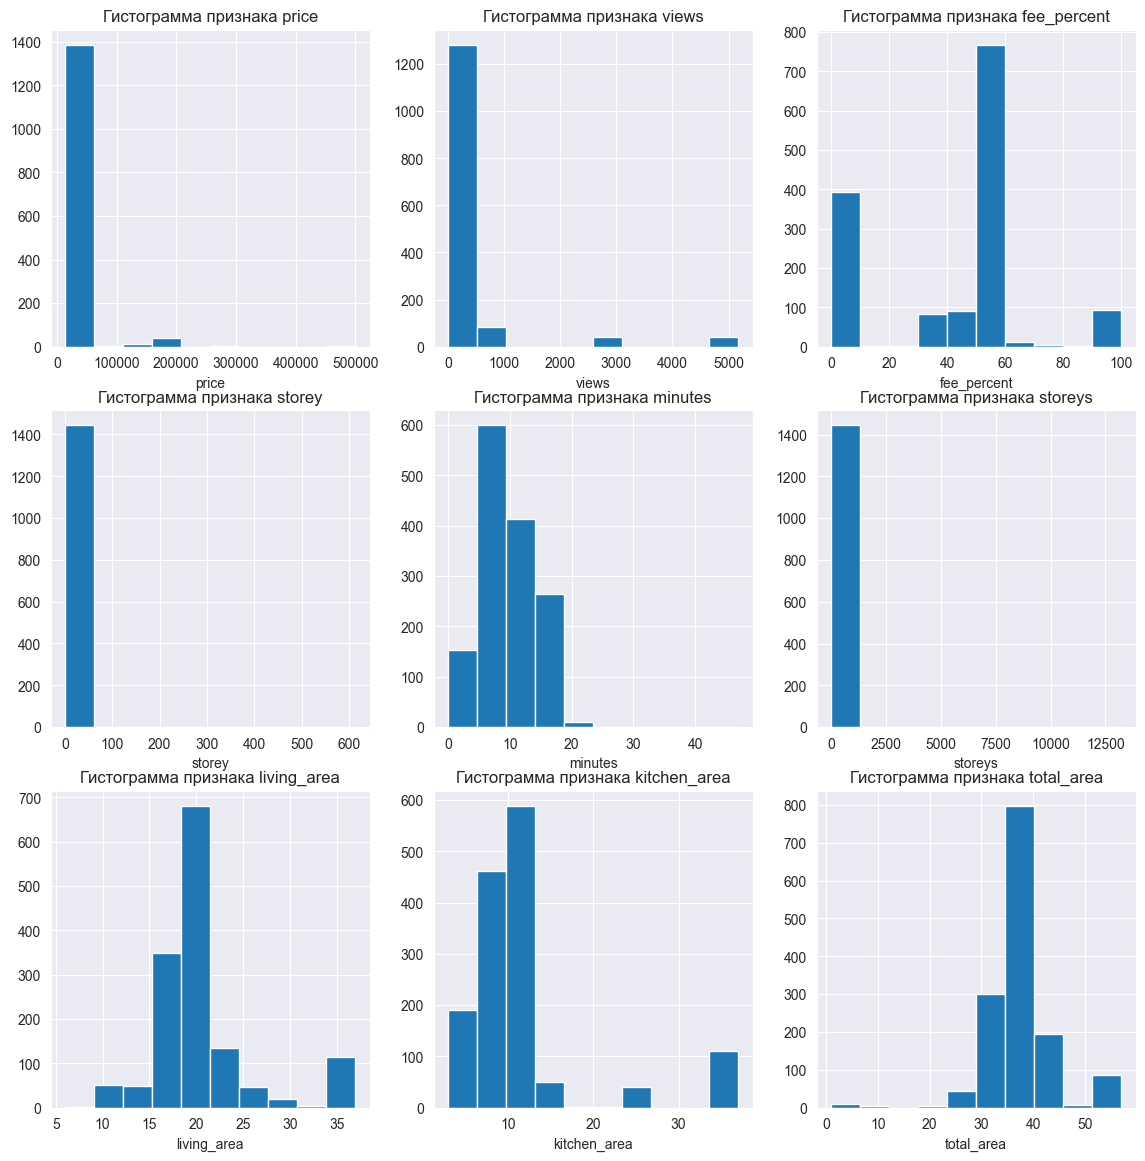

In [23]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64']).columns

fig, axes = plt.subplots(3, 3, figsize=(14, 14))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col])
    axes[i].set_title(f'Гистограмма признака {col}')
    axes[i].set_xlabel(col)

8. Нарисуйте scatterplot всех пар переменных с помощью sns.pairplot. (**1**)

C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

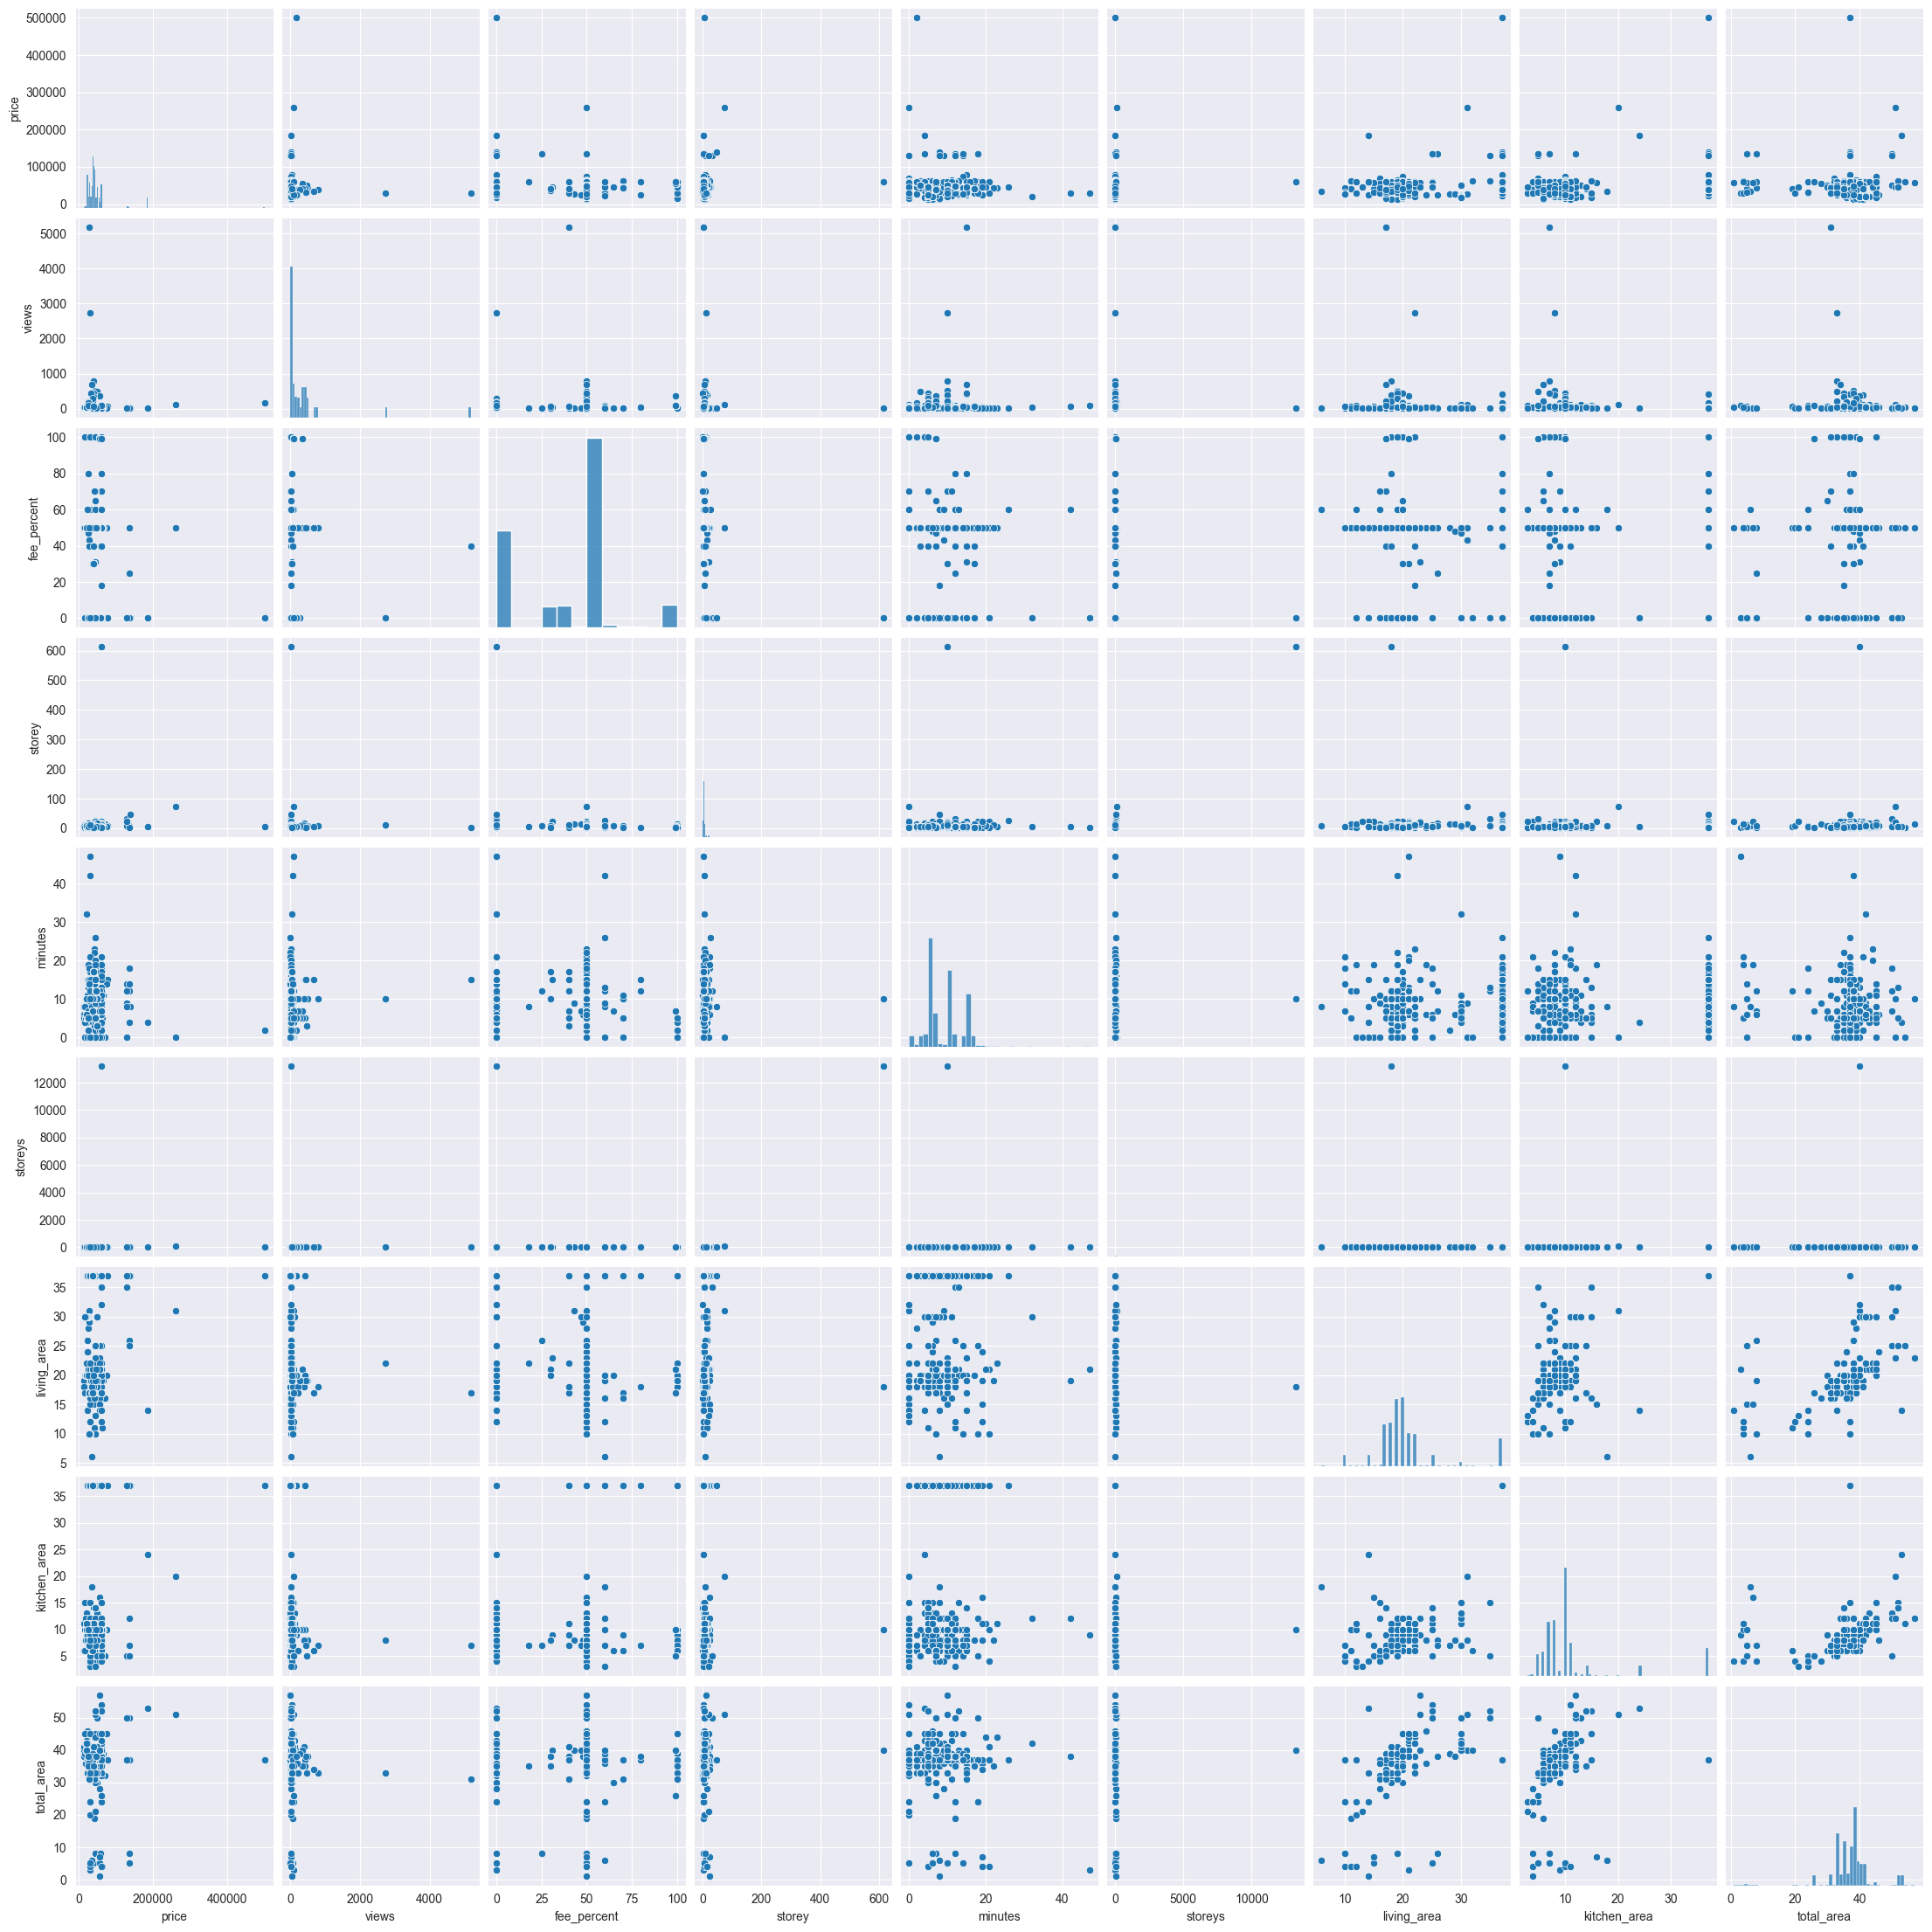

In [24]:
import seaborn as sns

sns.pairplot(df.select_dtypes(include=['int64']))

9. Постройте таблицу корреляций и тепловую карту числовых переменных. Между какими переменными наблюдается линейная связь? (**2**)

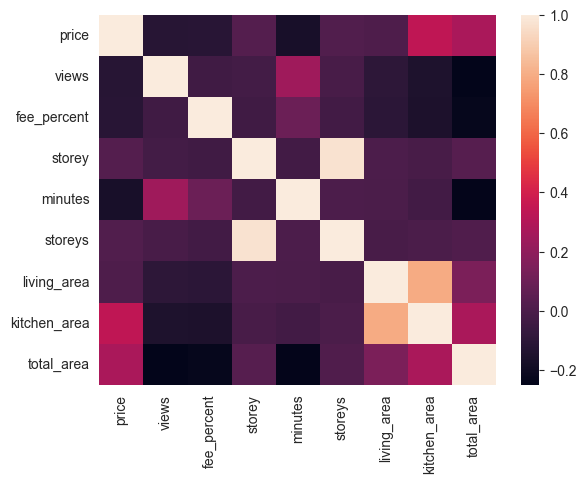

In [25]:
corr_matrix = df.select_dtypes(include=['int64']).corr()

sns.heatmap(corr_matrix)
plt.show()

> Ответ: между переменными storey и storeys наблюдается линейная связь, тк коэф корреляции 1

#### Часть 2. Построение модели. 50 баллов

1. Раздйлите датасет на обучающую и тестовую выборку. Постройте линейную регрессию для переменной price, используя только числовые переменные. Перед этим стандартизируйте все независимые переменные с помощью StandardScaler. (**5**)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [27]:
X = df.drop(columns=['price', 'metro', 'way', 'provider'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

2. Сделайте прогноз, посчитайте MSE и RMSE модели на тестовой выборке (**5**)

In [30]:
from math import sqrt
y_pred = model.predict(X_test_scaled)

mse = MSE(y_test, y_pred)
rmse = sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 941086139329.6649, RMSE: 970095.9433631629


3. Закодируйте переменные way	и	provider с помощью OneHotEncoding и добавьте их в модель. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [47]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first')
cat_encoded = encoder.fit_transform(df[['way', 'provider']])

df_cat = pd.DataFrame(cat_encoded.toarray(), columns=encoder.get_feature_names_out(['way', 'provider']))

df_cat

,way_walk,provider_owner,provider_realtor,provider_Застройщик
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
1441,1.0,0.0,1.0,0.0
1442,1.0,0.0,1.0,0.0
1443,1.0,0.0,1.0,0.0
1444,1.0,0.0,1.0,0.0


In [48]:
X_cat = pd.concat([df.drop(columns=['price', 'way', 'provider', 'metro']), df_cat], axis=1)

X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=42)

X_train_cat = scaler.fit_transform(X_train_cat)
X_test_cat = scaler.transform(X_test_cat)

model_with_cat = LinearRegression()
model_with_cat.fit(X_train_cat, y_train)

LinearRegression()

In [49]:
X_cat.sample(10)

,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area,way_walk,provider_owner,provider_realtor,provider_Застройщик
939,414,50,3,15,5,37,37,37,1.0,0.0,1.0,0.0
91,28,40,11,5,17,22,9,38,1.0,0.0,0.0,0.0
817,389,50,16,10,16,18,8,41,1.0,0.0,1.0,0.0
11,445,50,1,15,12,19,7,38,1.0,0.0,1.0,0.0
1213,795,50,8,10,9,18,7,33,1.0,0.0,1.0,0.0
1052,173,0,5,5,17,20,10,38,1.0,0.0,1.0,0.0
1251,28,0,4,4,11,14,24,53,1.0,1.0,0.0,0.0
1375,56,50,10,5,14,22,11,42,1.0,0.0,1.0,0.0
1195,56,50,10,5,14,22,11,42,1.0,0.0,1.0,0.0
1241,5174,40,2,15,5,17,7,31,1.0,0.0,1.0,0.0


In [34]:
y_pred = model_with_cat.predict(X_test_cat)

mse = MSE(y_test, y_pred)
rmse = sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 804096400704.2588, RMSE: 896714.2246581453


4. Удалите из обучающей выборке выбросы по цене (тестовую выборку не трогайте!)
Выбросами считайте цены, которые дороже, чем $Q3+1.5 * IQR$, где $IQR$ - межквартильный размах,
$Q3$ - 75 перцентиль. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [35]:
import numpy as np

q1 = np.percentile(y_train, 25)
q3 = np.percentile(y_train, 75)

X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=42)

X_train_cat = X_train_cat[y_train <= q3 + 1.5 * (q3 - q1)]
y_train = y_train[y_train <= q3 + 1.5 * (q3 - q1)]

X_train_cat = scaler.fit_transform(X_train_cat)
X_test_cat = scaler.transform(X_test_cat)

model_cat_new = LinearRegression()
model_cat_new.fit(X_train_cat, y_train)

LinearRegression()

In [36]:
y_pred = model_cat_new.predict(X_test_cat)

mse = MSE(y_test, y_pred)
rmse = sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 76545189865.69724, RMSE: 276668.0138102293


5. Попробуйте написать свою реализацию функций MSE, RMSE, R2. Функции
должны принимать на вход numpy-массив истинных значений и предсказаний
и возвращать результат. Примените функции к предсказаниям последней модели.
Сравните результат с библиотечной реализацией. (**9**)

Напоминаем, что

${MSE}=\frac{1}{n} \sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2$, где $y_i$ - истинное значение на i-ом наблюдении, $\hat{y_i}$  - предсказание модели на i-ом наблюдении.

Также рекомендуем ознакомиться с документацией: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

R2 (коэффициент детерминации) - доля дисперсии, объясненная моделью. Поподробнее о реалиации можно почитать здесь: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

In [37]:
def MSE(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [38]:
def RMSE(y_true, y_pred):
    rmse = sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse

In [39]:
def r2(y_true, y_pred):
    num = np.sum((y_true - y_pred) ** 2)
    den = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (num /den)
    return r2

In [40]:
from sklearn.metrics import mean_squared_error as MSE_sklearn, r2_score


mse = MSE_sklearn(y_test, y_pred)
rmse = sqrt(mse)
r2_sklearn = r2_score(y_test, y_pred)

mse_my = MSE(y_test, y_pred)
rmse_my = RMSE(y_test, y_pred)
r2_my = r2(y_test, y_pred)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_sklearn}')
print(f'My realisation of MSE: {mse_my}, RMSE: {rmse_my}, R2: {r2_my}')

MSE: 76545189865.69724, RMSE: 276668.0138102293, R2: -68.82567807910674
My realisation of MSE: 76545189865.69724, RMSE: 276668.0138102293, R2: -68.82567807910674


6. Напишите класс CleanData. Этот класс будет отвечать за заполнение пропусков и кодирование переменных методами OneHotEncoding и MeanTargetEncoding. (**15**). В классе обязательно должны присутствовать методы fit и transform. transform должен возвращать трансформированный датасет.
Пользователь при создании экземпляра класса может указывать:
- список столбцов для кодирования OneHotEncoding
- список столбцов для кодирования MeanTargetEncoding
- стратегию заполнения пропусков (заполнение средним / медианным значением и т.п.; можете принимать на вход словарь, чтобы реализовать разные стратегии для разных столбцов)

 Все остальные особенности реализации остаются на Ваше усмотрение.

In [149]:
class CleanData:
    def __init__(self, cols_for_ohe=None, cols_for_mte=None, cols_with_misses=None):
        self.fill_val = {}
        self.global_mean_target = None
        if cols_with_misses is None:
            cols_with_misses = {}
        if cols_for_mte is None:
            cols_for_mte = []
        if cols_for_ohe is None:
            cols_for_ohe = []

        self.cols_ohe = cols_for_ohe
        self.cols_mte = cols_for_mte
        self.cols_miss = cols_with_misses
        self.encoder = None
        self.mean_targets = {}

    def fit(self, X, y=None):
        # X_copy = X.copy()
        for col, i in self.cols_miss.items():
            if i == 'mean':
                self.fill_val[col] = X[col].mean()
            elif i == 'median':
                self.fill_val[col] = X[col].median()

        if self.cols_ohe:
            self.encoder = OneHotEncoder(drop='first')
            self.encoder.fit(X[self.cols_ohe])

        if self.cols_mte:
            self.mean_targets = {}
            temp_df = X.copy()
            temp_df['target'] = y
            for column in self.cols_mte:
                self.mean_targets[column] = temp_df.groupby(temp_df[column])['target'].mean().to_dict()
                # print(self.mte_means[column])

            self.global_mean_target = y.mean()

    def transform(self, X):
        X_copy= X.copy()

        for col, val in self.fill_val.items():
            X_copy[col].fillna(val, inplace=True)

        if self.cols_ohe:
            ohe_encoded = self.encoder.transform(X_copy[self.cols_ohe]).toarray()
            ohe_encoded = pd.DataFrame(ohe_encoded,
                                       columns=self.encoder.get_feature_names_out(self.cols_ohe),
                                       index=X_copy.index)
            X_copy = X_copy.drop(columns=self.cols_ohe)
            # print(X_copy.head(3))
            X_copy = pd.concat([X_copy, ohe_encoded], axis=1)
            # print(X_copy.head(4))

        if self.cols_mte:
            for column in self.cols_mte:
                # print(X_copy.head(3))
                X_copy[f'{column}_mean_price'] = X_copy[column].map(self.mean_targets[column])
                X_copy = X_copy.drop(columns=['metro'])
                X_copy[f'{column}_mean_price'].fillna(self.global_mean_target, inplace=True)
                # print(X_copy.head(4))

        return X_copy


    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)


7. Создайте и обучите пайплайн из CleanData, StandardScaler, LinearRegression. Посчитайте метрики. **(6)**

In [152]:
from sklearn.pipeline import Pipeline


X = df.drop(columns=['price'])
y = df['price']
# print(f'Shape X: {X.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(f'Shape train: {X_train.shape}')

cleaner = CleanData(cols_for_ohe=['way', 'provider'],
                cols_for_mte=['metro'],
)
pipeline = Pipeline([('clean_data', cleaner),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = MSE_sklearn(y_test, y_pred)
rmse = sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 13259425764.20271, RMSE: 115149.57995669245


In [111]:
X_train.head(5)

,metro,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
353,Kuntcevskaia,walk,40,owner,0,6,15,9,19,7,33
1090,Rimskaia,walk,360,realtor,99,6,7,17,21,10,40
602,Ulitca Starokachalovskaia,walk,173,realtor,0,5,5,17,20,10,38
1131,Vystavochnaia,walk,28,owner,0,4,4,11,14,24,53
221,Iugo-Zapadnaia,transport,35,Застройщик,50,6,11,7,20,9,38


In [101]:
print(df['metro'].unique())

[' Planernaia ' ' VDNKh ' ' Alekseevskaia ' ' Sviblovo ' ' Rimskaia '
 ' Perovo ' ' Nekrasovka ' ' Riazanskii prospekt ' ' Medvedkovo '
 ' Khovrino ' ' Okskaia ' ' Vystavochnaia ' ' Otradnoe ' ' Kuntcevskaia '
 ' Shabolovskaia ' ' Dobryninskaia ' ' Paveletckaia ' ' Altufevo '
 ' Tcaritcyno ' ' Shchelkovskaia ' ' Skhodnenskaia ' ' Solntcevo '
 ' Ulitca Starokachalovskaia ' ' Zhulebino '
 ' Preobrazhenskaia ploshchad ' ' Rasskazovka ' ' Buninskaia Alleia '
 ' Fili ' ' Kommunarka ' ' Cherkizovskaia ' ' Lukhmanovskaia '
 ' Teplyi Stan ' ' Prazhskaia ' ' Mezhdunarodnaia ' 'No data'
 ' Filatov Lug ' ' Annino ' ' Beliaevo ' ' Liublino ' ' Kuzminki '
 ' Novye Cheremushki ' ' Marino ' ' Strogino ' ' Salarevo '
 ' Piatnitckoe shosse ' ' Izmailovskaia ' ' Petrovsko-Razumovskaia '
 ' Tekstilshchiki ' ' Novokosino ' ' Ulitca Dmitrievskogo ' ' Nagornaia '
 ' Dubrovka ' ' Partizanskaia ' ' Bulvar Rokossovskogo '
 ' Petrovskii park ' ' Narodnoe Opolchenie ' ' Mitino ' ' Studencheskaia '
 ' Bulvar Admi

## Задача 2. (15 баллов)

### 2.1 (10)
Напишите код, который будет асинхронно загружать данные из нескольких веб-страниц.
Используйте библиотеку aiohttp для выполнения HTTP-запросов.
Программа должна выводить количество символов, загруженных из каждой страницы.

In [158]:
import asyncio
import aiohttp

async def fetch(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            return await response.text()

async def main(urls):
    tasks = [fetch(url) for url in urls]
    results = await asyncio.gather(*tasks)

    for url, content in zip(urls, results):
        print(f"{url}: {len(content)} символов")
urls = [
        "https://www.python.org",
        "https://www.wikipedia.org",
        "https://www.ya.ru"
        ###
    ]

await main(urls)

https://www.python.org: 51127 символов
https://www.wikipedia.org: 108300 символов
https://www.ya.ru: 18045 символов


In [153]:
!pip install aiohttp

     ---------------------------------------- 0.0/381.1 kB ? eta -:--:--
     --- ----------------------------------- 30.7/381.1 kB 1.3 MB/s eta 0:00:01
     ----- ------------------------------- 61.4/381.1 kB 648.1 kB/s eta 0:00:01
     ---------- ------------------------- 112.6/381.1 kB 930.9 kB/s eta 0:00:01
     ------------- ---------------------- 143.4/381.1 kB 847.9 kB/s eta 0:00:01
     ------------- ---------------------- 143.4/381.1 kB 847.9 kB/s eta 0:00:01
     ------------------------ ----------- 256.0/381.1 kB 983.0 kB/s eta 0:00:01
     -------------------------------------- 381.1/381.1 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/89.2 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/89.2 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/89.2 kB ? eta -:--:--
     -------------------------------------- 89.2/89.2 kB 724.0 kB/s eta 0:00:00
  Using cached async_timeout-4.0.3-py3-none-any.whl (5.7 kB)
     ---


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 2.2 (**5**)

Какие ошибки могут возникнуть в процессе исполнения кода выше? Как их можно обработать? Добавьте обработку ошибок в Ваш код.

## Задава 3 (25 баллов)


Напишите класс **Task**. У него должны быть следующие атрибуты:
* `number` - номер задачи
* `name` - название задачи


Напишите метод `init` (**2 балла**)

Переопределите для класса метод `str`, который вернет строку вида `f"{number}.{name}"`. (**3 балла**)

Теперь напишите класс **ProgrammingTask**, который является наследником класса Task.

Он должен дополнительно иметь методы:
* `language` - язык программирования (строка) - **1 балла**
* `list_of_students` - список студентов (список list, элементы которого - строки), которые решили задачу. По умолчанию список пустой. **(1 балл)**


Этот класс должен поддерживать следующие методы:
* `str `- вернет строку вида `f"{number}.{name} ({language})"`. **2 балла**
* `get_student_list`(без дополнительных аргументов) - возвращает значение `list_of_students`. **2 балла**
* `add_student` - принимает строку с фамилией студента и обновляет аргумент `list_of_students`. **2 балла**
* `task_from_str` - метод, который принимает на вход строку в формате `f"{number}.{name}.{language}"`
и возращает объект `Task` с соответствующими значениями number и name и значением `list_of_students` - пустой список. **2 балла**
* добавьте возможность сравнивать задачи между собой с помощью знака `==`. Сравнение должно возвращать True, если у задач совпадают номера и названия. **2 балла**


Создайте список задач tasklist (это объект list, каждый элемент которого - объект Task или ProgrammingTask).
Добавьте в него пять любых задач. **2 балла**

Отсортируйте задачи по номеру, при совпадении номеров - по названию.  **2 балла**

Добавьте аннотацию типов с помощью typing.  **2 балла**

Напишите docstrings ко всем методам.  **2 балла**

In [10]:
from typing import List, Union


class Task:
    def __init__(self, number: int, name: str):
        self.number = number
        self.name = name

    def __str__(self) -> str:
        return f"{self.number}.{self.name}"

    def __eq__(self, other: 'Task') -> bool:
        return self.number== other.number and self.name == other.name


class ProgrammingTask(Task):
    def __init__(self, number: int, name: str, language: str, list_of_students=None):
        super().__init__(number, name)
        if list_of_students is None:
            list_of_students = []
        self.list_of_students = list_of_students
        self.language = language

    def __str__(self) -> str:
        return f"{self.number}.{self.name} ({self.language})"

    def get_student_list(self) -> List[str]:
        return self.list_of_students

    def add_student(self, student: str) -> None:
        self.list_of_students.append(student)

    @staticmethod
    def task_from_str(s: str) -> Task:
        num_and_name, lang = s.split(' (')
        num, name = num_and_name.split('.', 1)
        lang = lang.rstrip(')')
        num = int(num)

        return ProgrammingTask(num, name.strip(), lang.strip())


tasks = [ProgrammingTask(1, "work1", "python"), ProgrammingTask(2, "work2", "python"),
                     Task(3, "work3"), Task(4, "work5"), Task(4, "wwork4")]

tasks_sort = sorted(tasks, key=lambda x: (x.number, x.name))
for i in tasks_sort:
    print(i)



1.work1 (python)
2.work2 (python)
3.work3
4.work5
4.wwork4


In [4]:
# этот код можете использовать для проверки Вашего класса
task1 = Task(1, 'A')
print(task1)
print(task1.number)
print(task1.name)
task2 = ProgrammingTask(1, 'A', 'python')
print(task2)
print(task2.number)
print(task2.name)
print(task2.language)
print(task2.get_student_list())
task2.add_student('Student1')
print(task2.get_student_list())
task3 = ProgrammingTask(1, 'A', 'C++')
task4 = ProgrammingTask(3, 'A', 'python')
print(task2 == task3)
print(task2 == task4)

1.A
1
A
1.A (python)
1
A
python
[]
['Student1']
True
False
